In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Broomhall_2009_Table_1.csv')
df.head()

,n,l = 0,l = 1,l = 2,l = 3,l = 4
0,6,972.613 ± 0.002,NaN,NaN,NaN,NaN
1,7,NaN,1185.592 ± 0.004,NaN,NaN,NaN
2,8,1263.162 ± 0.012,1329.629 ± 0.004,1394.680 ± 0.011,NaN,NaN
3,9,1407.481 ± 0.006,1472.836 ± 0.005,1535.861 ± 0.008,1591.575 ± 0.014,NaN
4,10,1548.336 ± 0.007,1612.723 ± 0.007,1674.540 ± 0.008,1729.092 ± 0.016,NaN


In [3]:
df = df.loc[df["l = 0"].notna()]

In [4]:
df["l = 0"] = df["l = 0"].str.split(" ± ")
df.head()

,n,l = 0,l = 1,l = 2,l = 3,l = 4
0,6,"[972.613, 0.002]",NaN,NaN,NaN,NaN
2,8,"[1263.162, 0.012]",1329.629 ± 0.004,1394.680 ± 0.011,NaN,NaN
3,9,"[1407.481, 0.006]",1472.836 ± 0.005,1535.861 ± 0.008,1591.575 ± 0.014,NaN
4,10,"[1548.336, 0.007]",1612.723 ± 0.007,1674.540 ± 0.008,1729.092 ± 0.016,NaN
5,11,"[1686.601, 0.011]",1749.285 ± 0.007,1810.314 ± 0.009,1865.307 ± 0.019,NaN


In [5]:
df[["nu", "nu_err"]] = df["l = 0"].apply(lambda data: pd.Series(data, index=["nu", "nu_err"])).astype(float)

In [6]:
n = df["n"].to_numpy()
nu, nu_err = df[["nu", "nu_err"]].to_numpy().T

In [7]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [8]:
# Plotting style setup
plt.style.use('seaborn-darkgrid')
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.size'] = 12.0
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [9]:
nu_max = (3090., 5.)  # in microhertz
delta_nu = (135.2, 0.5)   # in microhertz
teff = (4777., 10.)    # in Kelvin

In [10]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

INFO[2022-03-08 16:32:35,112]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-03-08 16:32:35,113]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-03-08 16:32:35,113]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [11]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

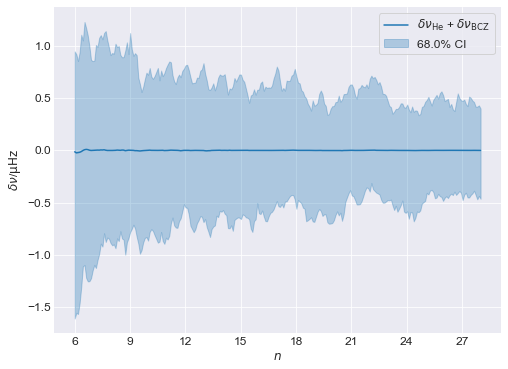

In [12]:
ast.plot_glitch(prior_data, group='prior');

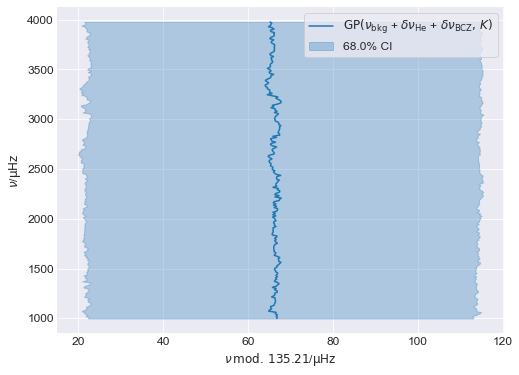

In [13]:
ast.plot_echelle(prior_data, group='prior');

In [14]:
infer.sample()
infer.posterior_predictive()

Running nested sampling using the 'multi_ellipsoid' sampler with 100 live points and 100000 maximum samples...
Completed in 15.8 seconds.


In [15]:
data = infer.get_data()

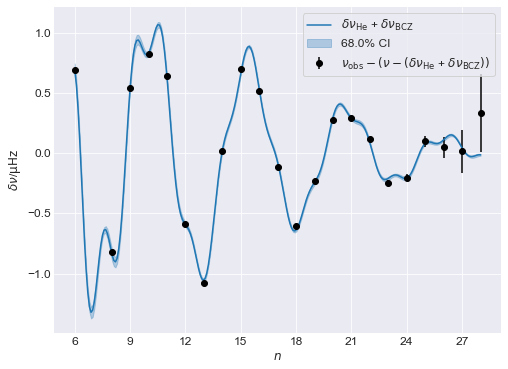

In [16]:
ast.plot_glitch(data);

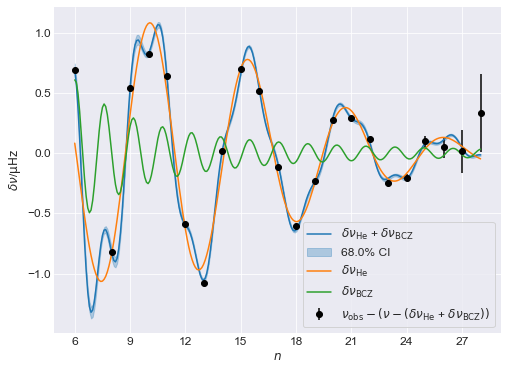

In [17]:
ax = ast.plot_glitch(data)
ax = ast.plot_glitch(data, kind='He', observed=False, quantiles=[], ax=ax)
ax = ast.plot_glitch(data, kind='CZ', observed=False, quantiles=[], ax=ax)

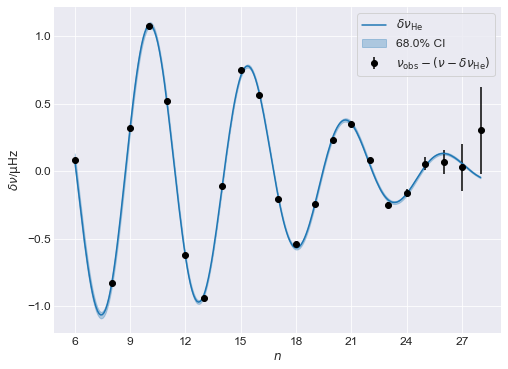

In [18]:
ast.plot_glitch(data, kind='He');

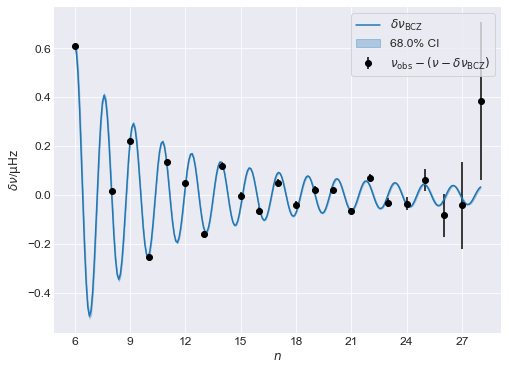

In [19]:
ax = ast.plot_glitch(data, kind='CZ')

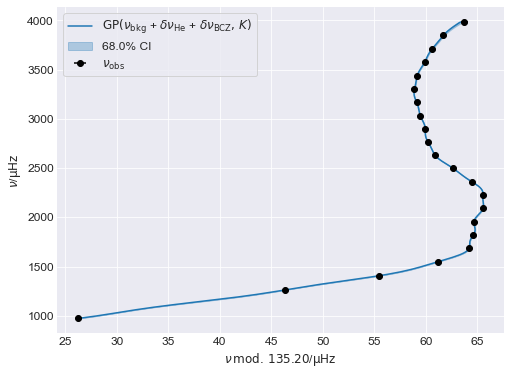

In [20]:
ast.plot_echelle(data, delta_nu=delta_nu[0]);

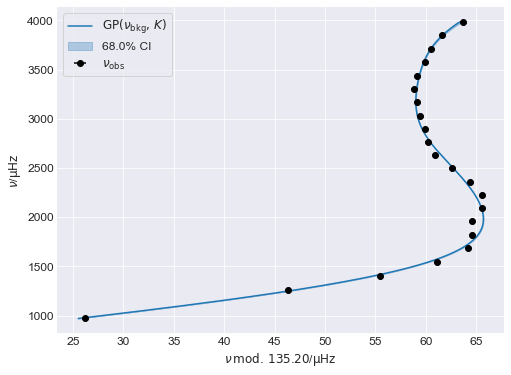

In [21]:
ast.plot_echelle(data, kind='glitchless', delta_nu=delta_nu[0]);

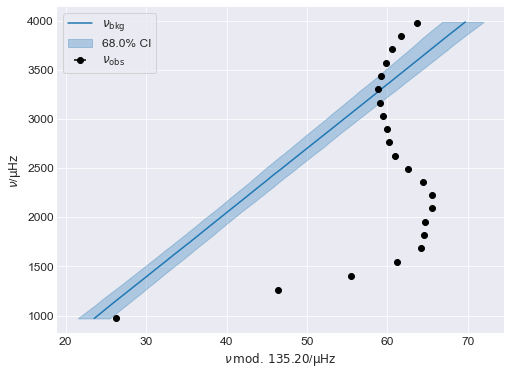

In [22]:
ast.plot_echelle(data, kind='background', delta_nu=delta_nu[0]);

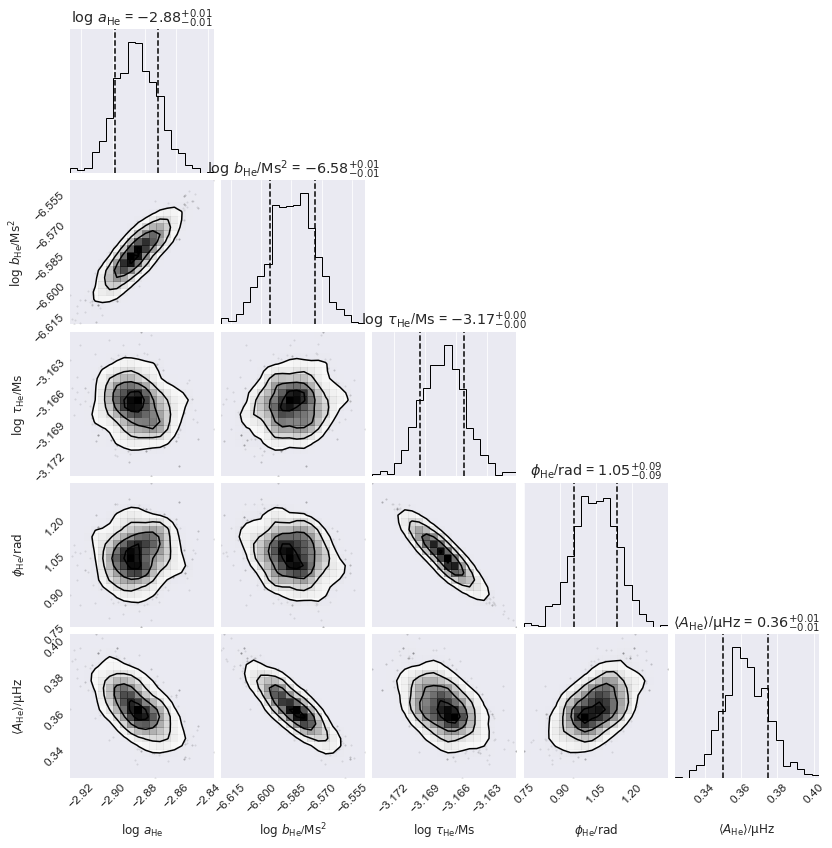

In [23]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

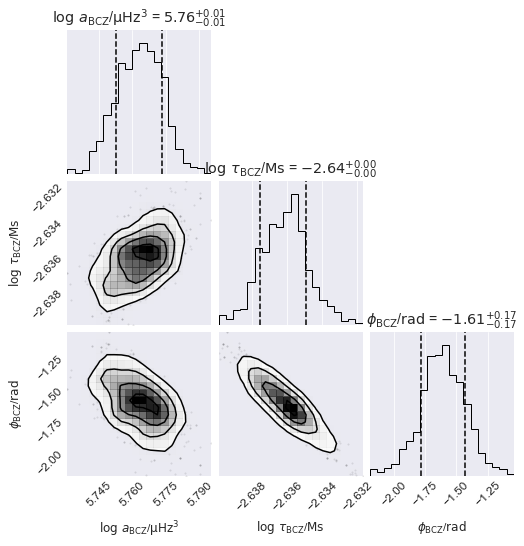

In [24]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz']);

Be careful when interpretting $\Delta\nu$ and $\epsilon$. These parameters are specific to this model and may be sensitive to the radial orders observed.

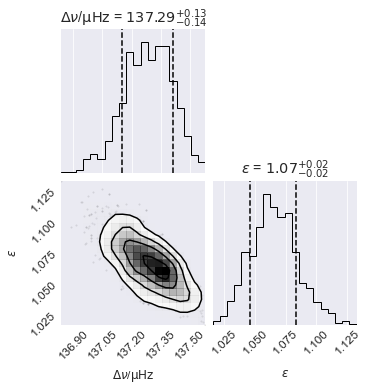

In [25]:
ast.plot_corner(data, var_names=['delta_nu', 'epsilon']);

In [26]:
tau_he = 10**(-3.17+6)  # seconds
print(f"{tau_he=:.0f} s")

tau_he=676 s


In [27]:
delta_he = np.sqrt(10**(-6.58)/2)/2/np.pi * 1e6  # seconds
print(f"{delta_he=:.0f} s")

delta_he=58 s


In [28]:
tau_cz = 10**(-2.64+6)  # seconds
print(f"{tau_cz=:.0f} s")

tau_cz=2291 s
